# CNMF-E demo pipeline: Intro 
This notebook demonstrates how to use Caiman for processing 1p microendoscopic data. It shows how to use Caiman for the following steps:

![workflow diagram](images/full_cnmfe_workflow.jpg)

1. Apply the nonrigid motion correction (NoRMCorre) algorithm for motion correction to the original movie.
2. Apply the constrained nonnegative matrix factorization endoscopic (CNMF-E) source separation algorithm to extract an initial estimate of neuronal spatial footprint and calcium traces.
3. Apply quality control metrics to evaluate the initial estimates to narrow them down to a final set of estimates.

Tools for visualization of movies and results are also included. 

> This demo follows a similar pattern to the CNMF demo in `demo_pipeline.ipynb`. It includes less explanation except where there are important differences. If you want to get a more explanation-heavy picture of the fundamentals, we suggest starting with `demo_pipeline.ipynb`.

# Imports and general setup

2024-12-08 12:07:41.286293: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-08 12:07:41.286317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-08 12:07:41.286753: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
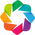

In [1]:
import bokeh.plotting as bpl
import cv2
import glob
import holoviews as hv
from IPython import get_ipython
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import psutil

import caiman as cm
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF
from caiman.utils.utils import download_demo
from caiman.utils.visualization import inspect_correlation_pnr, nb_inspect_correlation_pnr
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import params as params
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
from caiman.utils.visualization import view_quilt

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
        # get_ipython().run_line_magic('matplotlib', 'qt')  #uncomment to run in qt mode
except NameError:
    pass

try:
    cv2.setNumThreads(0)
except:
    pass

bpl.output_notebook()
hv.notebook_extension('bokeh')

Set up logger and environment variables

In [2]:
# set up logging
logfile = None # Replace with a path if you want to log to a file
logger = logging.getLogger('caiman')
# Set to logging.INFO if you want much output, potentially much more output
logger.setLevel(logging.WARNING)
logfmt = logging.Formatter('%(relativeCreated)12d [%(filename)s:%(funcName)20s():%(lineno)s] [%(process)d] %(message)s')
if logfile is not None:
    handler = logging.FileHandler(logfile)
else:
    handler = logging.StreamHandler()
handler.setFormatter(logfmt)
logger.addHandler(handler)

# set env variables in case they weren't already set
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"

# Set path to file to be processed
In this demo, we analyze the data in `data_endoscope.tif`. This movie provides sample microendoscopic data from mouse dorsal striatum where the neurons are expressing GCaMP6f. The original movie was sampled at 30Hz but spatially cropped and downsampled to 10Hz to save space for the demo -- see [the original CNMFE paper](https://elifesciences.org/articles/28728#s3) for more details about the data.

The `download_demo` function will download the file and return the filepath, which will be stored in your `caiman_data` directory:

In [3]:
movie_path = download_demo('data_endoscope.tif')  

> When adapting this demo for your data make sure to store the full path to your movie in the `movie_path` variable. Also, for reasons we will explain below, the memory requirement of the CNMF-E algorithm are much higher compared to the CNMF algorithm. If your datasets are too large, you might need to use our online algorithms. We discuss this more in `demo_pipeline.ipynb`. 

# Load and visualize raw data
We visualize using the built-in movie object, which is described in detail in `demo_pipeline.ipynb`. In addition to neural activity, you can also see blood flow through blood vessels in the movie. Such background activity, standard for 1p data, brings new analysis challenges. 

In [4]:
# press q to close
movie_orig = cm.load(movie_path) 
downsampling_ratio = 0.2  # subsample 5x
movie_orig.resize(fz=downsampling_ratio).play(gain=0.9,
                                              q_max=99.5, 
                                              fr=10,
                                              plot_text=True,
                                              magnification=4,
                                              do_loop=True,
                                              backend='opencv')

# Set up multicore processing
To enable parallel computing we will enable multiple CPUs for processing. The resulting `cluster` variable contains the pool of processors (CPUs) that will be used in later steps. If you use `dview=cluster` in later steps, then parallel processing will be used. If you use `dview=None` then no parallel processing will be used. The `num_processors_to_use` variable determines how many CPU cores you will use (when set to `None` it goes to the default of one less than the number available):

In [5]:
print(f"You have {psutil.cpu_count()} CPUs available in your current environment")
num_processors_to_use = None

You have 32 CPUs available in your current environment


If you have already set up multiprocessing (the `cluster` variable is already in your namespace), then that cluster will be closed and a new one created.

In [6]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
if 'cluster' in locals():  # 'locals' contains list of current local variables
    print('Closing previous cluster')
    cm.stop_server(dview=cluster)
print("Setting up new cluster")
_, cluster, n_processes = cm.cluster.setup_cluster(backend='multiprocessing', 
                                                 n_processes=num_processors_to_use, 
                                                 ignore_preexisting=False)
print(f"Successfully set up cluster with {n_processes} processes")

Setting up new cluster
Successfully set up cluster with 31 processes


# Define parameters
We first set some parameters related to the data and motion correction and create a `params` object. We'll modify this parameter object later on with settings for source extraction. You can also set all the parameters at once as demonstrated in the `demo_pipeline.ipynb` notebook.

Note here we are setting `pw_rigid` to `False`, as our data seems to mainly contain large-scale translational motion. We can always redo this later if it turns out to be a mistake.

In [7]:
# dataset dependent parameters
frate = 10                       # movie frame rate
decay_time = 0.4                 # length of a typical transient in seconds

# motion correction parameters
motion_correct = True    # flag for performing motion correction
pw_rigid = False         # flag for performing piecewise-rigid motion correction (otherwise just rigid)
gSig_filt = (3, 3)       # sigma for high pass spatial filter applied before motion correction, used in 1p data
max_shifts = (5, 5)      # maximum allowed rigid shift
strides = (48, 48)       # start a new patch for pw-rigid motion correction every x pixels
overlaps = (24, 24)      # overlap between patches (size of patch = strides + overlaps)
max_deviation_rigid = 3  # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy'      # replicate values along the boundaries

mc_dict = {
    'fnames': movie_path,
    'fr': frate,
    'decay_time': decay_time,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan
}

parameters = params.CNMFParams(params_dict=mc_dict)

        6843 [params.py:       change_params():1151] [1384219] In setting CNMFParams, non-pathed parameters were used; this is deprecated. In some future version of Caiman, allow_legacy will default to False (and eventually will be removed)


# Motion Correction
The background signal in micro-endoscopic data is very strong and makes motion correction challenging. As a first step the algorithm performs a high pass spatial filtering with a Gaussian kernel to remove the bulk of the lower-frequency background activity and enhance spatial landmarks. The size of the kernel is given from the parameter `gSig_filt`. If this is left to the default value of `None` then no preprocessing is performed (default option, used in 2p data for CNMF). 

After spatial filtering, the NoRMCorre algorithm is used to determine the motion in each frame. The inferred motion is then applied to the *original* data, not the preprocessed data, so no information is lost before source separation. The motion corrected files are saved in memory mapped format. If no motion correction is performed (i.e., `motion_correct` was set to `False`), then the file gets directly memory mapped.

> For a more detailed exploration of Caiman's motion correction pipeline, see `demo_motion_correction.ipynb`. 

The following also plots the discovered displacements in x- and y- directions.

        7032 [movies.py:      extract_shifts():326] [1384219] Movie average is negative. Removing 1st percentile.
        7032 [movies.py:      extract_shifts():344] [1384219] Movie average is negative. Removing 1st percentile.
        7048 [movies.py:      extract_shifts():326] [1384219] Movie average is negative. Removing 1st percentile.
        7049 [movies.py:      extract_shifts():344] [1384219] Movie average is negative. Removing 1st percentile.
        7066 [movies.py:      extract_shifts():326] [1384219] Movie average is negative. Removing 1st percentile.
        7066 [movies.py:      extract_shifts():344] [1384219] Movie average is negative. Removing 1st percentile.


CPU times: user 387 ms, sys: 83 ms, total: 470 ms
Wall time: 666 ms


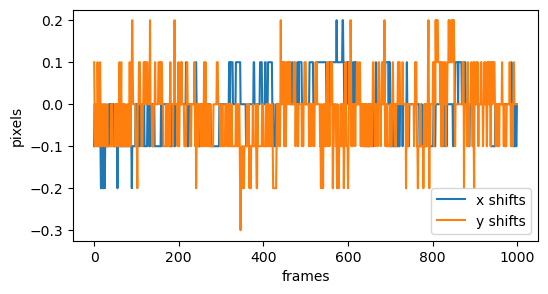

In [8]:
%%time
if motion_correct:
    # do motion correction rigid
    mot_correct = MotionCorrect(movie_path, dview=cluster, **parameters.get_group('motion'))
    mot_correct.motion_correct(save_movie=True)
    fname_mc = mot_correct.fname_tot_els if pw_rigid else mot_correct.fname_tot_rig
    if pw_rigid:
        bord_px = np.ceil(np.maximum(np.max(np.abs(mot_correct.x_shifts_els)),
                                     np.max(np.abs(mot_correct.y_shifts_els)))).astype(int)
    else:
        bord_px = np.ceil(np.max(np.abs(mot_correct.shifts_rig))).astype(int)
        # Plot shifts
        plt.plot(mot_correct.shifts_rig)  # % plot rigid shifts
        plt.legend(['x shifts', 'y shifts'])
        plt.xlabel('frames')
        plt.ylabel('pixels')
        plt.gcf().set_size_inches(6,3)

    bord_px = 0 if border_nan == 'copy' else bord_px
    fname_new = cm.save_memmap(fname_mc, base_name='memmap_', order='C',
                               border_to_0=bord_px)
else:  # if no motion correction just memory map the file
    fname_new = cm.save_memmap(movie_path, base_name='memmap_',
                               order='C', border_to_0=0, dview=dview)

Compare original (left panel) and motion corrected movie (right panel). You will notice they look similar, as there wasn't much motion to begin with. You can see from the shift plot (plotted above) that the extracted shifts were all very small.

In [9]:
movie_corrected = cm.load(mot_correct.mmap_file) # load motion corrected movie
ds_ratio = 0.2
cm.concatenate([movie_orig.resize(1, 1, ds_ratio) - mot_correct.min_mov*mot_correct.nonneg_movie,
                movie_corrected.resize(1, 1, ds_ratio)], 
                axis=2).play(fr=10, 
                             gain=0.9, 
                             magnification=2) 

100%|██████████| 1/1 [00:00<00:00, 46.17it/s]


## Load memory mapped file
Memory mapping is discussed in more detail in `demo_pipeline.ipynb`.

In [10]:
# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
images = Yr.T.reshape((T,) + dims, order='F')

# Parameter setting for CNMF-E
Everything is now set up to run source extraction with CNMFE. We will construct a new parameter dictionary and use this to modify the *existing* `parameters` object, using the `change_params()` method.

There are *two* main differences between the CNMF and CNMFE source separation algorithms. The first is the background model (this is discussed in the sidebar below on the Ring Model). The second difference is in how the models are initialized. This is addressed below when we go over setting corr/pnr thresholds for initialization, which we did not have to do for our 2p data.

For now, note that we have set `gnb` to `0`: this is effectively the flag telling Caiman to use CNMFE instead of CNMF. 

In [11]:
# parameters for source extraction and deconvolution
p = 1               # order of the autoregressive system
K = None            # upper bound on number of components per patch, in general None for CNMFE
gSig = np.array([3, 3])  # expected half-width of neurons in pixels 
gSiz = 2*gSig + 1     # half-width of bounding box created around neurons during initialization
merge_thr = .7      # merging threshold, max correlation allowed
rf = 40             # half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
stride_cnmf = 20    # amount of overlap between the patches in pixels 
tsub = 2            # downsampling factor in time for initialization, increase if you have memory problems
ssub = 1            # downsampling factor in space for initialization, increase if you have memory problems
gnb = 0             # number of background components (rank) if positive, set to 0 for CNMFE
low_rank_background = None  # None leaves background of each patch intact (use True if gnb>0)
nb_patch = 0        # number of background components (rank) per patch (0 for CNMFE)
min_corr = .8       # min peak value from correlation image
min_pnr = 10        # min peak to noise ration from PNR image
ssub_B = 2          # additional downsampling factor in space for background (increase to 2 if slow)
ring_size_factor = 1.4  # radius of ring is gSiz*ring_size_factor

parameters.change_params(params_dict={'method_init': 'corr_pnr',  # use this for 1 photon
                                'K': K,
                                'gSig': gSig,
                                'gSiz': gSiz,
                                'merge_thr': merge_thr,
                                'p': p,
                                'tsub': tsub,
                                'ssub': ssub,
                                'rf': rf,
                                'stride': stride_cnmf,
                                'only_init': True,    # set it to True to run CNMF-E
                                'nb': gnb,
                                'nb_patch': nb_patch,
                                'method_deconvolution': 'oasis',       # could use 'cvxpy' alternatively
                                'low_rank_background': low_rank_background,
                                'update_background_components': True,  # sometimes setting to False improve the results
                                'min_corr': min_corr,
                                'min_pnr': min_pnr,
                                'normalize_init': False,               # just leave as is
                                'center_psf': True,                    # True for 1p
                                'ssub_B': ssub_B,
                                'ring_size_factor': ring_size_factor,
                                'del_duplicates': True,                # whether to remove duplicates from initialization
                                'border_pix': bord_px});                # number of pixels to not consider in the borders)

        8515 [params.py:       change_params():1151] [1384219] In setting CNMFParams, non-pathed parameters were used; this is deprecated. In some future version of Caiman, allow_legacy will default to False (and eventually will be removed)


Initialize the model using the parameters.

In [12]:
cnmfe_model = cnmf.CNMF(n_processes=n_processes, 
                        dview=cluster, 
                        params=parameters)

<div class="alert alert-info">
    <h2 >CNMF-E: The Ring Model</h2>
   Background activity is very ill-behaved with 1p recordings: it often fluctuates locally and is much larger in magnitude than the neural signals we want to extract. In other words, the large-scale background model used for CNMF is not sufficient for most 1p data. Hence, Pengcheng Zhou and others came up with a localized model of background activity for CNMFE: the background at each pixel is represented as the weighted sum of activity from a circle (or ring) of pixels a certain distance from that pixel. The distance of this ring from the reference pixel is set by the <em>ring_size_factor</em> parameter. This more complex pixel-by-pixel background model explains why CNMFE is computationally more expensive than CNMF, and also why it works better to mop up large-scale localized background noise in  1p data. 
    
<p>When you set <em>gnb</em> in the CNMF model (usually to 1 or 2), you are setting the number of global background components. The fact that you can get away with so few is testament to how well-behaved the background activity is in 2p recordings. When we set <em>gnb</em> to 0 in Caiman, this is a flag telling Caiman's back end to switch to the more complicated ring model of the background activity.</p>

For more details on CNMFE you can see the <a href="https://elifesciences.org/articles/28728">original paper</a> and the <a href="https://elifesciences.org/articles/38173">Caiman paper</a>. 
</div>

## Key parameters for CNMFE
The key parameters for CNMFE are slightly different than for CNMF, but with some overlap. As we'll see, because of the high levels of background activity, we can't initialize the same way as with CNMF. We have two new important parameters directly related to initialization that come into play: `min_corr` and `min_pnr`. 

`rf` (int): *patch half-width*
> `rf`, which stands for 'receptive field', is the half width of patches in pixels. The patch width is `2*rf + 1`. `rf` should be *at least* 3-4 times larger than the observed neuron diameter. The larger the patch size, the less parallelization will be used by Caiman. If `rf` is set to `None`, then CNMFE will be run on the entire field of view.

`stride` (int): *patch overlap*
> `stride` is the overlap between patches in pixels (the actual overlap is `stride_cnmf + 1`). This should be at least the diameter of a neuron. The larger the overlap, the greater the computational load, but the results will be more accurate when stitching together results from different patches. This param should probably have been called 'overlap' instead of 'stride'.

`gSig (int, int)`: *half-width of neurons*
> `gSig` is roughly the half-width of neurons in your movie in pixels (height, width). It is the standard deviation of the mean-centered Gaussian used to filter the movie before initialization for CNMFE. It is related to the `gSiz` parameter, which is the width of the entire kernel filter.

`merge_thr (float)`: *merge threshold* 
> If the correlation between two spatially overlapping components is above `merge_thr`, they will be merged into one component. 

`min_corr` (float): *minimum correlation*
> Pixels from neurons tend to be correlated with their neighbors. During initialization, Caiman filters out those pixels below `min_corr` to help select seed pixels. We discuss this more below.

`min_pnr` (float): *minimum peak to noise ratio*
> Pixels from neurons tend to have a high signal-to-noise ratio. During initialization, Caiman filters out those pixels below `min_pnr` to help select seed pixels. We discuss this more below.

## Inspect summary images and set parameters
### Correlation-pnr plot
For CNMFE, Caiman uses the correlation and peak-to-noise ratio (PNR) for initialization, which will both tend to be high in regions that contain neurons. Hence, we set a threshold for both quantitites to remove the low correlation/low pnr regions and seed initialization with regions most likely to contain neuronal activity. 

First, we calculate the correlation and pnr maps of the raw motion corrected movie after filtering with a mean-centered Gaussian with standard deviation `gSig` (for more information on this preprocessing step, see the sidebar below on CNMFE initialization). These calculation can be computationally and memory demanding for large datasets, so we subsample if there are many thousands of frames:

In [13]:
print(gSig)
gsig_tmp = (3,3)
correlation_image, peak_to_noise_ratio = cm.summary_images.correlation_pnr(images[::max(T//1000, 1)], # subsample if needed
                                                                           gSig=gsig_tmp[0], # used for filter
                                                                           swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile

[3 3]


<img src="images/bokeh_menu.jpg" align="right" width="200"></img>
Using `nb_inspect_correlation_pnr()`, you can inspect the correlation and PNR images to find threshold values for these quantities: `min_corr` and `min_pnr`. You can adjust the range of values displayed in the two subplots below by choosing the Y-box select tool (third button from the left -- highlighted in yellow in the accompanying image to the right) and selecting the desired region in the histograms on the right hand side of each image. You can also use the pan button (first button on the left) to zoom/adjust the axis limits in the histogram to make it easier to see the limits.

In [14]:
nb_inspect_correlation_pnr(correlation_image, peak_to_noise_ratio, cmap='inferno') # jet, fire are also good cmaps

BokehModel(combine_events=True, render_bundle={'docs_json': {'b0d58479-5086-4c98-b614-afbfb4faa8df': {'version…

We are looking for a couple of things in the above plot:
1) Did we filter with a `gSig` value small enough so that we aren't blending different neurons together? To see what it is like when `gSig` is too large, set `gsig_tmp` to `(6,6)` in the above cell and then inspect the resulting correlation-pnr plots. 
2) More importantly, we want to find the threshold correlation and pnr values so that the *lower* threshold eliminates most of the noise and blood vessels from the plots, leaving behind as many of the *neural* pixels as possible. For this data it will be at a correlation value lower bound between 0.8 and 0.9, and a pnr lower bound somewhere between 10 and 20. As with CNMF, there is no perfect value. Just keep in mind it is better to have false positives later than false negatives.

You can tweak the parameters in the following cell, using the `change_params()` method:

In [15]:
gsig_new = gSig # unchanged
min_corr_new  = 0.85 
min_pnr_new = 12     

cnmfe_model.params.change_params(params_dict={'gSig': gsig_new,
                                              'min_corr': min_corr_new, 
                                              'min_pnr': min_pnr_new});

        9697 [params.py:       change_params():1151] [1384219] In setting CNMFParams, non-pathed parameters were used; this is deprecated. In some future version of Caiman, allow_legacy will default to False (and eventually will be removed)


> Caiman also includes a Qt-based corr-pnr viewer that some people prefer: `inspect_correlation_pnr()`. It provides what some say is a more intuitive interface than the notebook version above. It requires you to be in Qt mode (which you can enable using the cell magic `%matplotlib qt`).

<div class="alert alert-info">
    <h2>CNMFE initialization: More on correlation and peak-to-noise-ratio</h2>
     <img src="images/mn_centered_gaussian.jpg" align="right" width="200"></img>
How are correlation and peak-to-noise ratio actually calculated? First Caiman convolves the motion corrected movie with a <i>mean-centered Gaussian</i> (example to the right). The sigma of the Gaussian is <em>gSig</em>, and mean centering is turned on by setting <em>center_psf</em> to <em>True</em>. This mean centering creates a Gaussian with a positive peak in the middle of width <i>approximately</i> <em>gSig/2</em>, surrounded by a negative trench, and a ledge of zeros around the outer edges. This crucial preprocessing filter serves to highlight neuronal peaks and smooth away low-frequency background activity.

<p>The function <em>correlation_pnr()</em> applies this mean-centered Gaussian to each frame of the motion corrected movie and returns the correlation image of that movie, as well as the peak-to-noise-ratio (PNR). The correlation image is the correlation of each pixel with its neighbors. The PNR is the ratio of the maximum magnitude at a pixel to the noise value at that pixel (it is a fast and rough measure of signal-to-noise). As mentioned above, both of these values tend to be higher in pixels that contain neurons. The CNMFE initialization procedure is to set a threshold for both quantities, take their <i>product</i>, and use the peaks in this product map to find <b>seed pixels</b> for initialization of the CNMFE source separation algorithm.</p>

More details on the initialization procedure used here can be found in the <a href="https://elifesciences.org/articles/28728">CNMFE paper</a>, or by exploring the code.         
</div>

### Evaluate our spatial parameters
As discussed in `demo_pipeline.ipynb`, the other important parameters are those used for dividing the movie into patches for parallelization of the algorithm. Namely, we want to select `rf` and `stride` parameters so that at least 3-4 neuron diameters can fit into each patch, and at least one neuron fits in the overlap region between patches. You can visualize the patches using the `view_quilt()` function:

Patch width: 81 , Stride: 60, Overlap: 21


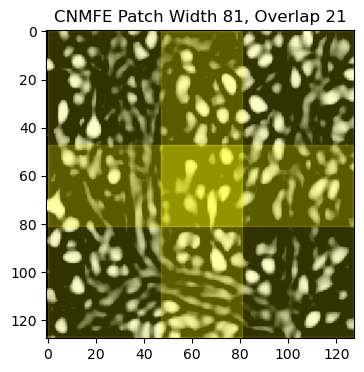

In [16]:
# calculate stride and overlap from parameters
cnmfe_patch_width = cnmfe_model.params.patch['rf']*2 + 1
cnmfe_patch_overlap = cnmfe_model.params.patch['stride'] + 1
cnmfe_patch_stride = cnmfe_patch_width - cnmfe_patch_overlap
print(f'Patch width: {cnmfe_patch_width} , Stride: {cnmfe_patch_stride}, Overlap: {cnmfe_patch_overlap}');

# plot the patches
patch_ax = view_quilt(correlation_image, 
                      cnmfe_patch_stride, 
                      cnmfe_patch_overlap, 
                      vmin=np.percentile(np.ravel(correlation_image), 50), 
                      vmax=np.percentile(np.ravel(correlation_image), 99.5),
                      color='yellow',
                      figsize=(4,4));
patch_ax.set_title(f'CNMFE Patch Width {cnmfe_patch_width}, Overlap {cnmfe_patch_overlap}');

These patches and overlaps may seem a bit large, but that is ok: our main concern is that they not be too small. If you wanted to change them, you could use `change_params()`.

Now that we are happy with our parameters, let's run the algorithm.

## Run the CNMF-E algorithm

In [17]:
%%time
cnmfe_model.fit(images);

/home/xhnfly-lpub22/miniconda3/envs/caiman/lib/python3.11/site-packages/scipy/sparse/_dia.py:292: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]
/home/xhnfly-lpub22/miniconda3/envs/caiman/lib/python3.11/site-packages/scipy/sparse/_dia.py:292: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]
/home/xhnfly-lpub22/miniconda3/envs/caiman/lib/python3.11/site-packages/scipy/sparse/_dia.py:292: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]
/home/xhnfly-lpub22/miniconda3/envs/caiman/lib/python3.11/site-packages/scipy/sparse/_dia.py:292: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]
       18215 [components_evaluation.py:classify_components_ep():236] [1384338] Component 3 is on

CPU times: user 335 ms, sys: 15.1 ms, total: 350 ms
Wall time: 8.28 s


Running the algorithm creates an `estimates` class, which we discuss in detail in `demo_pipeline.ipynb`. The CNMFE `estimates` class includes almost all the same attributes as with CNMF, such as the neural spatial and temporal components `A` and `C`. 

It also includes the discovered model of background activity, which is different from the CNMF model. For *CNMF* the background model is returned as low-rank matrices `b` and `f`. For CNMFE, the background model parameters are represented in the matrix `W` (the weights of the *ring model* -- discussed above -- for each pixel) as well as `b0` (a constant offset for each pixel). We will show how to reconstruct the background activity below. 

# Component Evaluation
Source extraction typically produces many false positives. Our next step is quality control: separating the results into "good" and "bad" neurons using two different metrics (discussed in detail in `demo_notebook.ipynb`):

- **Signal-to-noise ratio (SNR)**: a minimum SNR is set for the calcium transients (`min_SNR`).
- **Spatial correlation**:  a minimum correlation is set between the shape of each component and the frames in the movie when that component is active (`rval_thr`). 

> Caiman does *not* use the CNN classifier to sort neurons based on shape for 1p data: the network was trained on 2p data. Hence, we set the `use_cnn` param to `False`. 

Here we set the two parameters and run `evaluate_components()` to see which pass muster:

In [18]:
min_SNR = 3            # SNR threshold
rval_thr = 0.85    # spatial correlation threshold

quality_params = {'min_SNR': min_SNR,
                  'rval_thr': rval_thr,
                  'use_cnn': False}
cnmfe_model.params.change_params(params_dict=quality_params)

cnmfe_model.estimates.evaluate_components(images, cnmfe_model.params, dview=cluster)

print('*****')
print(f"Total number of components: {len(cnmfe_model.estimates.C)}")
print(f"Number accepted: {len(cnmfe_model.estimates.idx_components)}")
print(f"Number rejected: {len(cnmfe_model.estimates.idx_components_bad)}")

       18161 [params.py:       change_params():1151] [1384219] In setting CNMFParams, non-pathed parameters were used; this is deprecated. In some future version of Caiman, allow_legacy will default to False (and eventually will be removed)


*****
Total number of components: 96
Number accepted: 79
Number rejected: 17


# Visualize results

In [19]:
#%% plot contour plots of accepted and rejected components
cnmfe_model.estimates.plot_contours_nb(img=correlation_image, 
                                       idx=cnmfe_model.estimates.idx_components);

View traces of accepted and rejected components:

In [20]:
cnmfe_model.estimates.nb_view_components(img=correlation_image, 
                                        idx=cnmfe_model.estimates.idx_components,
                                        cmap='viridis', #gray
                                        thr=.9); #increase to see full footprint

In [21]:
# rejected components
cnmfe_model.estimates.nb_view_components(img=correlation_image, 
                                        idx=cnmfe_model.estimates.idx_components_bad,
                                        cmap='viridis', #gray
                                        denoised_color='red',
                                        thr=0.9); #increase to see full footprint

# Save and load results (optional)
If you want to save your results so you don't have to run CNMFE again:

In [22]:
save_results = True
if save_results:
    save_path =  r'demo_pipeline_cnmfe_results.hdf5'  # or add full/path/to/file.hdf5
    cnmfe_model.estimates.Cn = correlation_image # squirrel away correlation image with cnmf object
    cnmfe_model.save(save_path)

To load results and pick up where you left off (note this assumes you have done preliminaries like imports and started a cluster).

In [23]:
load_results = True
if load_results:
    save_path =  r'demo_pipeline_cnmfe_results.hdf5'  # or add full/path/to/file.hdf5
    cnmfe_model = load_CNMF(save_path, 
                                n_processes=num_processors_to_use, 
                                dview=cluster)
    correlation_image = cnmfe_model.estimates.Cn
    print(f"Successfully loaded data.")

Successfully loaded data.


# A few loose ends
We have extracted the calcium traces C, spatial footprints A, and estimated spike counts S, which is the main goal with CNMF. But there are a few important things remaining. 

## Extract $\Delta F/F$ values
Currently in Caiman, we don't return a true dff value for 1p data. This is because, as mentioned in `demo_pipeline.ipynb`,  Caiman normalizes to both the baseline fluorescence and background activity. The background activity in 1p is so ill-behaved (as discussed above in the sidebar on the ring model) that Caiman currently only *detrends* the data by subtracting away the baseline but not normalizing the data. This explains the warning you will see when you run the following:

In [24]:
if cnmfe_model.estimates.F_dff is None:
    print('Calculating estimates.F_dff')
    cnmfe_model.estimates.detrend_df_f(quantileMin=8, 
                                      frames_window=250,
                                      flag_auto=False,
                                      use_residuals=False);  # use denoised data
else:
    print("estimates.F_dff already defined")

       18764 [utilities.py:        detrend_df_f():494] [1384219] Background components not present. Results should not be interpreted as DF/F normalized but only as detrended.


Calculating estimates.F_dff


##  Deconvolution for 1p?
While we haven't discussed deconvolution (the estimation of the spikes that generated the calcium traces in `C`), we suggest treating the spike counts returned for 1p data (in `estimates.S`) with CNMFE with some caution. Currently (as of early 2024) we are aware of no simultaneous ground-truth recordings (electrophysiology + 1p imaging) that could be used to evaluate deconvolution models for 1p data. There are quite a few such recordings for 2p data (for instance see [the Spikefinder paper](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006157)).

Because of this, most researchers analyze the calcium traces directly for 1p recordings (the data in `estimates.C`) or a normalized version of them, rather than `estimates.S`.

## View some different movie results
As with CNMF, the CNMFE model of the original movie is:

    original_movie = neural_activity + background + residual
    
The main between CNMF and CNMFE is the model of the background. We can reconstruct the neural movie as `AC` just as we did in `demo_pipeline.ipynb`. Unfortunately, reconstructing the background activity via the ring model is much more complicated for CNMFE, so we will just punt to a built-in function for that in what follows, `compute_background()`, which you can explore if you are interested:

In [25]:
# in case you are working from loaded data, recover the raw movie
Yr, dims, num_frames = cm.load_memmap(cnmfe_model.mmap_file)
images = np.reshape(Yr.T, [num_frames] + list(dims), order='F')

Get model of neural activity and background activity (note for the neural model we are just including the accepted components):

In [26]:
neural_activity = cnmfe_model.estimates.A[:, cnmfe_model.estimates.idx_components] @\
                  cnmfe_model.estimates.C[cnmfe_model.estimates.idx_components, :]  # AC
neural_movie = cm.movie(neural_activity).reshape(dims + (-1,), order='F').transpose([2, 0, 1])
background_model = cnmfe_model.estimates.compute_background(Yr);  # build in function -- explore source code for details
bg_movie = cm.movie(background_model).reshape(dims + (-1,), order='F').transpose([2, 0, 1])

       18917 [estimates.py:  compute_background():724] [1384219] Computing the full background has big memory requirements!


### View neural movie

In [27]:
downsampling_ratio = 0.4 
neural_movie.resize(fz=downsampling_ratio).play(gain=1.1,
                                            q_max=99.5, 
                                            fr=20,
                                            plot_text=True,
                                            magnification=2,
                                            do_loop=False,
                                            backend='opencv')

### View background model
You will see many regions that are constant such as blood vessels, but also lots of large-scale background flourescence, in addition to some local activity which is is on spatial scales larger than `gSig`:

In [28]:
downsampling_ratio = 0.8 
bg_movie.resize(fz=downsampling_ratio).play(gain=1.1,
                                            q_max=99.5, 
                                            fr=10,
                                            plot_text=True,
                                            magnification=2,
                                            do_loop=False,
                                            backend='opencv')

### View model and residual
We can also use the built-in `play_movie()` method to view the original movie, predicted movie, and the residual simultaneously as discussed in more detail in `demo_pipeline.ipynb`: 

In [29]:
# without background
cnmfe_model.estimates.play_movie(images, 
                                 q_max=99.9, 
                                 magnification=2,
                                 include_bck=False,
                                 gain_res=5,
                                 use_color=True);

A couple of things to note about that movie:
- The middle panel of neural activity includes *all* components (accepted and rejected), so you will see some of the blood vessel "activity" that was discovered and later rejected.
- The residual includes some activity that looks neural in origin. You can try playing with different params to get them (which do you think you would try?). The [Mesmerize](https://github.com/nel-lab/mesmerize-core) package is a great way to search parameter space and visualize results with more sophisticated visualization tools if you have a tricky data set.

# Extract Signal and Analysis

In [ ]:
# 提取时间信号矩阵 (C)
calcium_signals = cnmfe_model.estimates.C  # Shape: [num_cells, num_frames]

# 提取原始信号 (F)
YrA_signals = cnmfe_model.estimates.YrA  # Shape: [num_cells, num_frames]

# 提取去卷积信号 (S)
spiking_signals = cnmfe_model.estimates.S  # Shape: [num_cells, num_frames]

## Visualize the traces

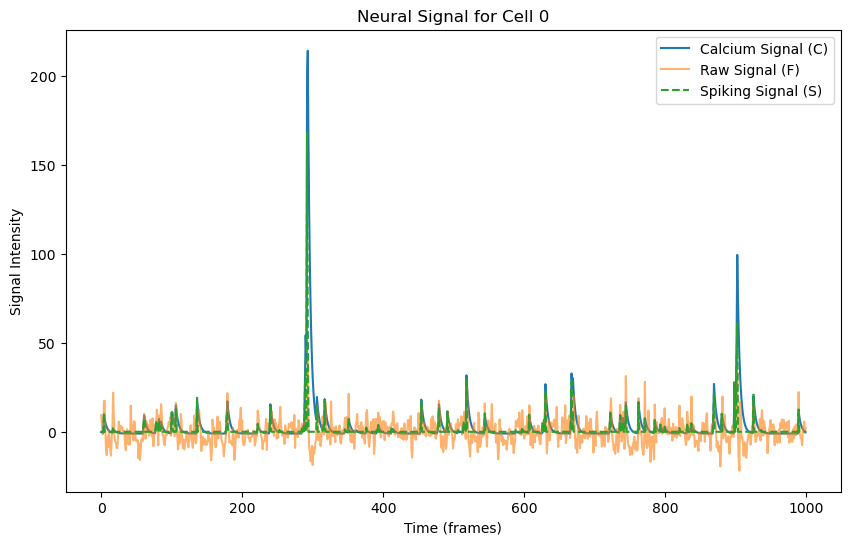

In [ ]:
import matplotlib.pyplot as plt

# 假设我们要绘制第一个神经元的信号
cell_index = 0

plt.figure(figsize=(10, 6))
plt.plot(calcium_signals[cell_index], label='Calcium Signal (C)')
plt.plot(YrA_signals[cell_index], label='YrA Signal (F)', alpha=0.6)
plt.plot(spiking_signals[cell_index], label='Spiking Signal (S)', linestyle='--')
plt.title(f"Neural Signal for Cell {cell_index}")
plt.xlabel("Time (frames)")
plt.ylabel("Signal Intensity")
plt.legend()
plt.show()

# OASIS Analysis pipeline

In [32]:
%matplotlib inline

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sys import path
path.append('..')
from oasis.functions import gen_data, gen_sinusoidal_data, deconvolve, estimate_parameters
from oasis.plotting import simpleaxis
from oasis.oasis_methods import oasisAR1, oasisAR2

/home/xhnfly-lpub22/miniconda3/envs/caiman/lib/python3.11/site-packages/oasis-0.2.0-py3.11-linux-x86_64.egg/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [38]:
def plot_trace(groundtruth=False):
    plt.figure(figsize=(20,4))
    plt.subplot(211)
    plt.plot(b+c, lw=2, label='denoised')
    if groundtruth:
        plt.plot(true_b+true_c, c='r', label='truth', zorder=-11)
    plt.plot(y, label='data', zorder=-12, c='y')
    plt.legend(ncol=3, frameon=False, loc=(.02,.85))
    simpleaxis(plt.gca())
    plt.subplot(212)
    plt.plot(s, lw=2, label='deconvolved', c='g')
    if groundtruth:
        for k in np.where(true_s)[0]:
            plt.plot([k,k],[-.1,1], c='r', zorder=-11, clip_on=False)
    plt.ylim(0,1.3)
    plt.legend(ncol=3, frameon=False, loc=(.02,.85));
    simpleaxis(plt.gca())
    if groundtruth:
        print("Correlation of deconvolved activity  with ground truth ('spikes') : %.4f" % np.corrcoef(s,true_s)[0,1])
        print("Correlation of denoised fluorescence with ground truth ('calcium'): %.4f" % np.corrcoef(c,true_c)[0,1])

Test example of OASIS deconvolution on a single trace.

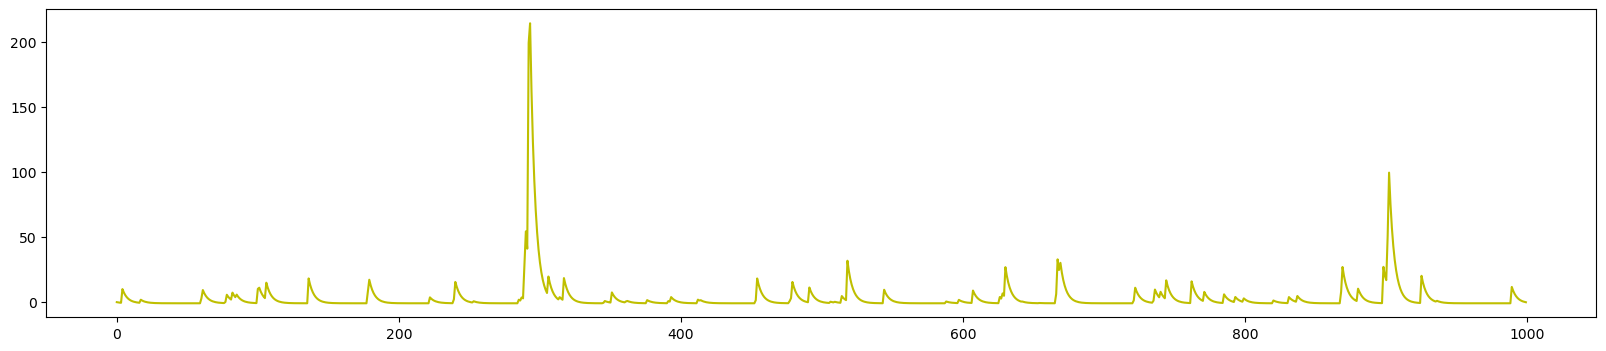

In [49]:
# here we generate some simulated fluorescence data and plot it
# true_b = 2
y = calcium_signals[cell_index]

# y = spiking_signals[cell_index]


# y, true_c, true_s = map(np.squeeze, gen_data(N=1, b=true_b, seed=0))
plt.figure(figsize=(20,4))
plt.plot(y, c='y');

## Deconvolution

In [52]:
%time c, s, b, g, lam = deconvolve(y, penalty=0)

CPU times: user 1.27 ms, sys: 0 ns, total: 1.27 ms
Wall time: 1.1 ms


plot results

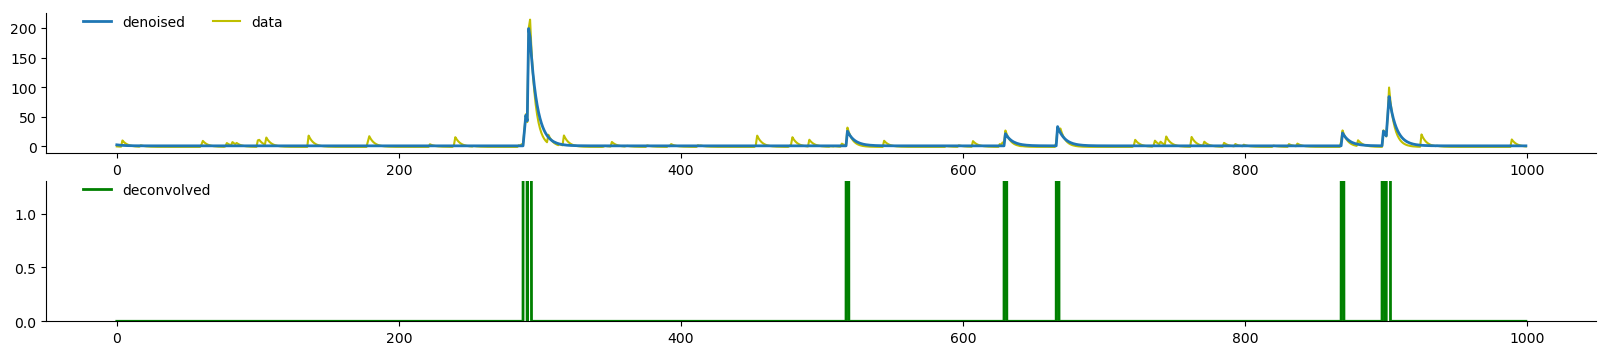

In [53]:
plot_trace()

# Clean up open resourses
Shut down server, close logger.

In [ ]:
cm.stop_server(dview=cluster)

In [ ]:
# Shut down logger (otherwise will not be able to delete it)
logging.shutdown()

In [ ]:
delete_logs = True
logging_dir = cm.paths.get_tempdir() 
if delete_logs:
    log_files = glob.glob(logging_dir + '\\demo_pipeline' + '*' + '.log')
    for log_file in log_files:
        print(f"Deleting {log_file}")
        os.remove(log_file)
else:
    print(f"If you want to inspect your logs they are in {logging_dir}")